<a href="https://www.kaggle.com/code/piotrpowroznik/l-vy-flight-dynamics-in-heat-distribution?scriptVersionId=266443042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Lévy Flight Dynamics in Heat Distribution
In this notebook will be presented distribution of heat generated by a fly. Fly like every other insect is moving according to Lévy distribution. The Lévy distribution is a probability distribution used to describe random movement patterns found in nature, especially in the foraging behaviors of animals.

The Levy distribution has density:
$$
f(y) = \sqrt{\frac{\sigma}{2\pi(y-\mu)^3}} exp(-\sigma/(2(y-\mu)))
$$
where μμ is the location parameter of the distribution and σσ is the dispersion, and y>μy>μ. 


In [1]:
install.packages("rmutil")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(animation)
library(IRdisplay)
library(rmutil)

Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr




Attaching package: ‘rmutil’




The following object is masked from ‘package:stats’:

    nobs




The following objects are masked from ‘package:base’:

    as.data.frame, units




## Model Area Properties

In [3]:
N <- 100

ani.options(interval = 0.1) # Increase animation speed

# Create NxN model matrix
Lnew <- matrix(nrow=N,ncol=N,0)
L <- matrix(nrow=N,ncol=N,0)

## Boundary conditions 
Initial temperature on model boundaries is set as zeros.

In [4]:
L[,1] <- rep(0,N)
L[,N] <- rep(0,N)
L[1,] <- rep(0,N)
L[N,] <- rep(0,N)

Lnew <- L

## Initial position
Initial position of fly is randomly generated.

In [5]:
pos <- round(runif(2)*(N-2)-1)
L[pos[1],pos[2]] <- 1

## Create Animation

In [6]:
saveGIF({
    # Initial properties image
    Limg <- apply(L, 2, rev)
    image(t(Limg))
    text(0.1,0.9,0)

    step_size <- 0.1
        
    for(k in 1:1000){
      # Laplace's equation for heat distribution
      for (i in 2:(N-1)){
        for (j in 2:(N-1)){
          Lnew[i,j] <- 0.25*(L[i-1,j]+L[i+1,j]+L[i,j-1]+L[i,j+1])
        }
      }
        
      L <- Lnew
      
      # Generate new fly position from Levy Distribution
      pom <- pos + round((2*rbinom(2,1,0.5)-1)*step_size *rlevy(2,m=0,s=1))
      while (pom[1]<=0 || pom[1]>=N || pom[2]<=0 || pom[2]>=N )
      {
          pom <- pos + round((2*rbinom(2,1,0.5)-1)*step_size *rlevy(2,m=0,s=1))
      }
      pos <- pom
      
      # Update temperature in fly position
      L[pos[1],pos[2]] <- 1
      
      # Add every 10 image to animation
      if(k %% 10 == 0){
        Limg <- apply(L, 2, rev)
        image(t(Limg))
        text(0.1,0.9,k)
      }
    
    }
}, img.name = "simulation", htmlfile = "simulation.html", autoplay = TRUE)


Output at: animation.gif



[1] TRUE

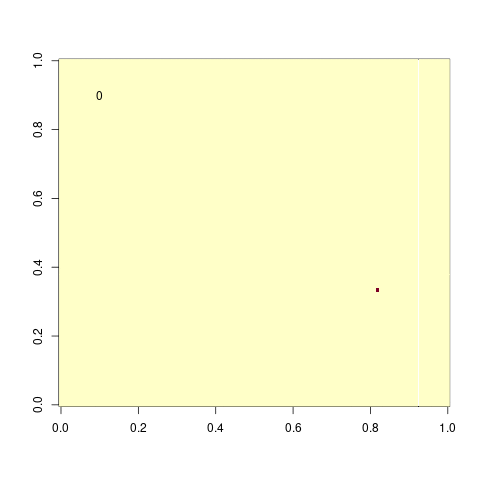

In [7]:
display_png(file = "animation.gif")